# Feature Selection

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score,train_test_split

filterwarnings('ignore')

## Setting up

In [8]:
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [27]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['Price'])
data = pd.concat((X,y),axis=1)

In [18]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## 1. Using correlation 

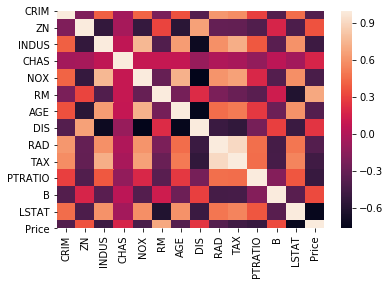

In [28]:
cor = data.corr()
sns.heatmap(cor)

In [30]:
cor['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

## 2. Recursive Feature Elimination

In [76]:
model = LinearRegression()

## initialize 
# Select 10 features
rfe = RFE(model,10)
rfe.fit(X,y)
# print(rfe.support_)
# print(rfe.ranking_)
pd.DataFrame({'Columns':X.columns,
             'Rankings':rfe.ranking_})


,Columns,Rankings
0,CRIM,1
1,ZN,1
2,INDUS,1
3,CHAS,1
4,NOX,1
5,RM,1
6,AGE,4
7,DIS,1
8,RAD,1
9,TAX,2


In [ ]:
KFold().fit(X)

#### Plot a graph to see number of features v/s score

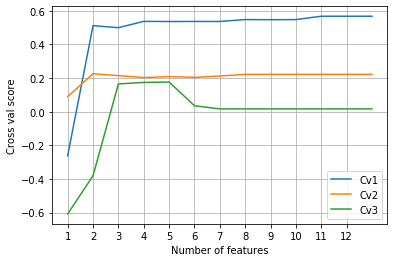

In [55]:
lasso = Lasso()
n_features, scores = [],[]

for i,_ in enumerate(X.columns,1):
    rfe = RFE(lasso,i)
    n_features.append(i)
    scores.append(cross_val_score(rfe, X, y, cv=3))

plt.plot(n_features,scores)
plt.xticks(range(1,13,1))
plt.xlabel('Number of features')
plt.ylabel('Cross val score')
plt.grid(True)
plt.legend(['Cv1','Cv2','Cv3'])
plt.show()

## 3. Foward Selection

In [79]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [87]:
model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

sfs1 = sfs(model,k_features=8,forward=True,scoring='r2',cv=3)

In [89]:
sfs1.get_metric_dict()

{1: {'feature_idx': (12,),
  'cv_scores': array([0.57870519, 0.57385642, 0.47295326]),
  'avg_score': 0.5418382883983724,
  'feature_names': ('LSTAT',),
  'ci_bound': 0.10970193133337351,
  'std_dev': 0.048749277828372094,
  'std_err': 0.03447094493038892},
 2: {'feature_idx': (5, 12),
  'cv_scores': array([0.60833469, 0.69220755, 0.58801071]),
  'avg_score': 0.6295176486378864,
  'feature_names': ('RM', 'LSTAT'),
  'ci_bound': 0.10148600172997677,
  'std_dev': 0.04509828800543824,
  'std_err': 0.03188930526854932},
 3: {'feature_idx': (5, 10, 12),
  'cv_scores': array([0.65900325, 0.71644285, 0.63294139]),
  'avg_score': 0.6694624937172645,
  'feature_names': ('RM', 'PTRATIO', 'LSTAT'),
  'ci_bound': 0.07849683752393774,
  'std_dev': 0.034882377134037544,
  'std_err': 0.024665565415384515},
 4: {'feature_idx': (5, 10, 11, 12),
  'cv_scores': array([0.6687113 , 0.7296148 , 0.64552979]),
  'avg_score': 0.6812852957001474,
  'feature_names': ('RM', 'PTRATIO', 'B', 'LSTAT'),
  'ci_bound':

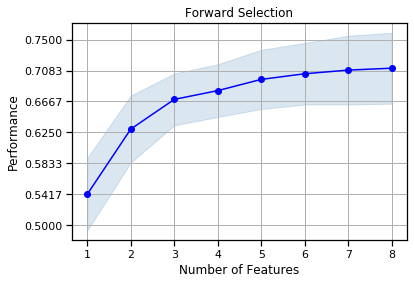

In [112]:
sfs1.fit(X_train,y_train)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward Selection')
plt.yticks(np.linspace(0.5,0.75,7))
plt.grid()
plt.show()

In [101]:
sfs1.k_features, sfs1.k_feature_names_

(8, ('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'))

In [91]:
sfs1.k_feature_idx_

(0, 3, 4, 5, 7, 10, 11, 12)

In [98]:
sfs1.k_score_

0.7114644720404052

## 4. Backward Elimination

In [108]:
model = LinearRegression()

sbs = sfs(model,k_features=1,forward=False,scoring='r2',cv=3)
sbs.fit(X_train,y_train)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=False, k_features=1, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

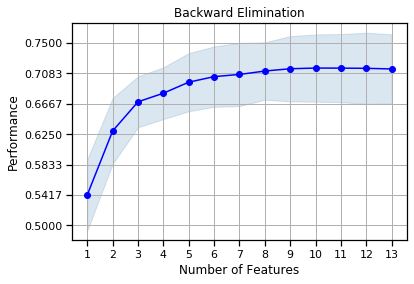

In [113]:
d = sbs.get_metric_dict()

fig = plot_sfs(sbs.get_metric_dict())
plt.title('Backward Elimination')
plt.yticks(np.linspace(0.5,0.75,7))
plt.grid()
plt.show()

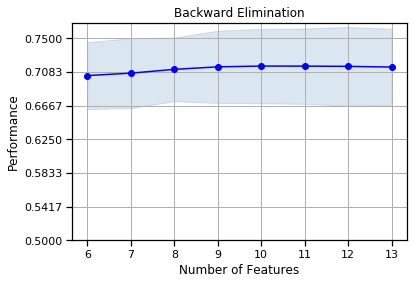

In [115]:
model = LinearRegression()
sbs = sfs(model,k_features=6,forward=False,scoring='r2',cv=3).fit(X_train,y_train)

fig = plot_sfs(sbs.get_metric_dict())
plt.title('Backward Elimination')
plt.yticks(np.linspace(0.5,0.75,7))
plt.grid()
plt.show()

### We can choose `n` = 9

The R2-score is not increasing significantly post the features.

In [118]:
np.logspace(-2,5,20)

array([1.00000000e-02, 2.33572147e-02, 5.45559478e-02, 1.27427499e-01,
       2.97635144e-01, 6.95192796e-01, 1.62377674e+00, 3.79269019e+00,
       8.85866790e+00, 2.06913808e+01, 4.83293024e+01, 1.12883789e+02,
       2.63665090e+02, 6.15848211e+02, 1.43844989e+03, 3.35981829e+03,
       7.84759970e+03, 1.83298071e+04, 4.28133240e+04, 1.00000000e+05])